<a href="https://colab.research.google.com/github/theJoChong/data-with-python/blob/main/Exploring_IMDb_Dataset_(1892_2004).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring Changes in Film Production and Rankings (1892–2004)


---





***How have film demand and audience critiques evolved over a century?***

Society has evolved rapidly, and so have people’s demands and views on entertainment. By examining trends in the number of films produced and their rankings, this project provides insights into public attitudes toward entertainment over time.

This project uses an online dataset available at:
https://raw.githubusercontent.com/lilaceri/Working-with-data-/refs/heads/main/Data%20Sets%20for%20code%20divisio/movies.csv.

The dataset includes information on directors, movies, release years, rankings, and genres. The original data is sourced from the Internet Movie Database (IMDb), a widely recognized open-source platform for film information. The full dataset can be found at:
https://relational.fel.cvut.cz/dataset/IMDb.

In [65]:
# Step 1: Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
# Step 2: Load the dataset
url = "https://raw.githubusercontent.com/lilaceri/Working-with-data-/refs/heads/main/Data%20Sets%20for%20code%20divisio/movies.csv"
df = pd.read_csv(url)

In [84]:
# Step 3: Check the data structure
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368894 entries, 0 to 368893
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  368894 non-null  int64  
 1   first_name  368894 non-null  object 
 2   last_name   368894 non-null  object 
 3   name        368894 non-null  object 
 4   year        368894 non-null  int64  
 5   rank        113376 non-null  float64
 6   genre       368894 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 19.7+ MB


None

,Unnamed: 0,first_name,last_name,name,year,rank,genre
0,0,Les,12 Poissons,Rondo pour trompette,2002,NaN,Short
1,1,Lejaren,a'Hiller,"Sleep of Cyma Roget, The",1920,NaN,Drama
2,2,Khairiya,A-Mansour,Churches in Iraq,1988,NaN,Documentary
3,3,Ricardo,A. Solla,"Foto, La",2001,NaN,Drama
4,4,Ricardo,A. Solla,"Foto, La",2001,NaN,Short


In [85]:
# Step 4: Initial cleaning
# Combine the first and last name for directors
df["director"] = df["first_name"] + " " + df["last_name"]
df = df.drop(columns=["first_name", "last_name"])

# Remove rows that without ranks
df = df.dropna(subset = ["rank"])

In [86]:
# Step 5: Understand data
# Descriptive statistics
display(df.describe())

# Check the range of years included in this dataset
years = max(df['year']) - min(df['year'])
print(f"The dataset covers a period of {years} years.")

# Check the number of movies, genres and directors
movies_no = len(df)
directors_no = len(df['director'].unique())
genres_no = len(df['genre'].unique())
print(f"There are {movies_no} movies in total, with {genres_no} genres, and {directors_no} directors.")
print("Below is a breakdown of genres and their respective film counts:")
genre_counts = df["genre"].value_counts()
print(genre_counts)

,Unnamed: 0,year,rank
count,113376.000000,113376.000000,113376.000000
mean,184806.412583,1975.102764,5.995124
std,106369.286163,24.166500,1.540330
min,77.000000,1892.000000,1.000000
25%,95164.250000,1955.000000,5.100000
50%,182475.500000,1981.000000,6.200000
75%,277251.250000,1997.000000,7.100000
max,368891.000000,2004.000000,9.900000


The dataset covers a period of 112 years.
There are 113376 movies in total, with 20 genres, and 22104 directors.
Below is a breakdown of genres and their respective film counts:
genre
Drama          24696
Comedy         20633
Short           9894
Action          5873
Romance         5476
Thriller        5440
Family          4845
Animation       4727
Crime           4488
Documentary     4296
Horror          4227
Adventure       3932
Sci-Fi          2699
Musical         2491
Western         2364
Fantasy         2123
Mystery         2012
War             1837
Music            908
Film-Noir        415
Name: count, dtype: int64


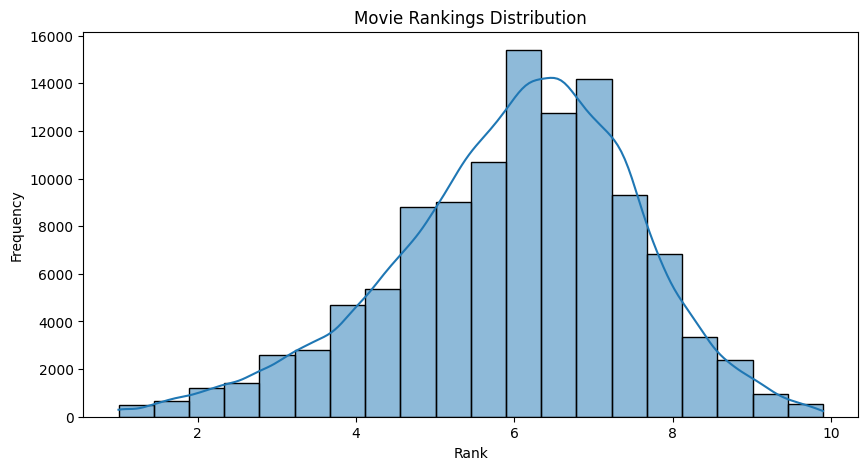

In [87]:
# Step 6: Examine trends
# Step 6.1: Create a histogram with ranking data
plt.figure(figsize=(10, 5))
sns.histplot(df["rank"], bins=20, kde=True)

# Add titles and labels, and show the graph
plt.title("Movie Rankings Distribution")
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.show()

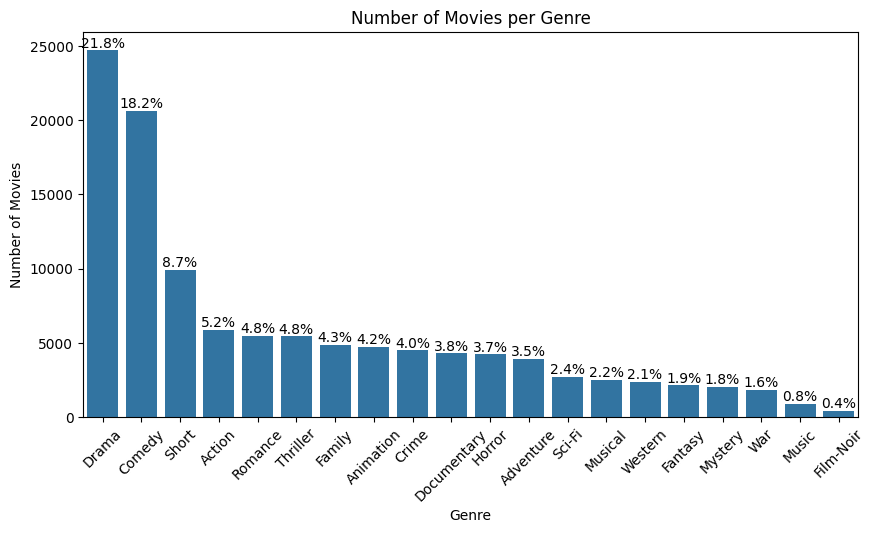

In [92]:
# Step 6.2: Create a pie chart for genres
# Counting number of films per genre
genre_counts = df['genre'].value_counts()

# Create bar chart
plt.figure(figsize=(10, 5))  # Set figure size
sns.barplot(x=genre_counts.index, y=genre_counts.values)

# Add percentage labels on top of the bars
total_movies = genre_counts.sum()
for i, value in enumerate(genre_counts.values):
    percentage = (value / total_movies) * 100
    plt.text(i, value + 0.5, f'{percentage:.1f}%', ha='center', va='bottom')

# Add labels and title, and show the graph
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.title("Number of Movies per Genre")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

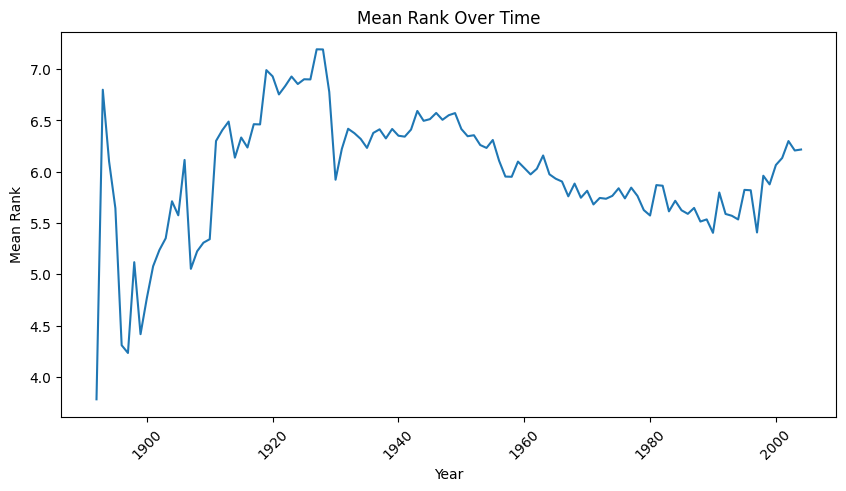

In [90]:
# Step 6.3: Create a line chart for rankings
# Grouping the data by 'year' and calculating the mean rank
rank_over_time = df.groupby("year")["rank"].mean().reset_index()

# Plotting the line graph
plt.figure(figsize=(10, 5))
sns.lineplot(data = rank_over_time, x="year", y="rank")

# Add labels and title, and show the graph
plt.xlabel("Year")
plt.ylabel("Mean Rank")
plt.title("Mean Rank Over Time")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Step 7: Download dataset
movies.to_csv("movies.csv", index=False)
files.download("movies.csv")

**Key Findings**

*   Ratings Distribution: Most films scored between 6 and 7, indicating a moderate to positive public perception of movies.
*   Genre Popularity: Drama and comedy were the most popular genres, accounting for 40% of all films, while film noir was the least popular, representing less than 1%.
*   Trends Over Time: Rankings steadily declined after 1920 as the number of films produced increased. This inverse trend continued until the 1990s, when ratings began to improve despite high production volumes.


**Implications**

*   As the number of films grew, their overall quality became more average, possibly due to increased production volumes and varying audience expectations.
*   The decline in rankings from the 1920s to the 1990s suggests that audiences may have become more critical as society progressed.
*   The improvement in ratings in the early 2000s, despite high production volumes, indicates that competition may have driven studios to produce higher-quality films to attract audiences and maximize revenue.


**Future Research**

*   Investigate whether certain genres consistently receive higher ratings.
*   Analyse the number of reviews per film to assess the reliability and significance of ratings.